### Week 2 Task

![Week 2 Task](Week_2_Task.png) 

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = Image.open('img.jpg')
img = np.array(img)
img.shape

(256, 256)

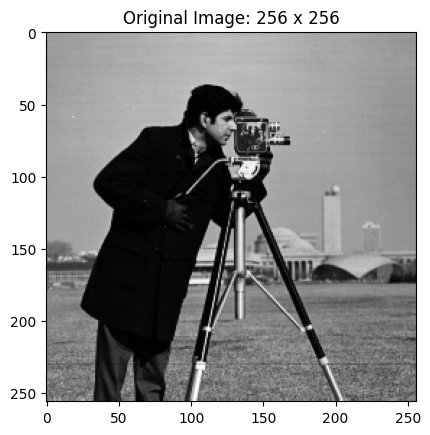

In [3]:
plt.imshow(img, cmap='gray')
plt.title('Original Image: 256 x 256')
plt.show()

In [5]:
img = Image.open('img.jpg')
resized_img = img.resize((128, 128))
resized_img = np.array(resized_img)
resized_img.shape

(128, 128)

In [59]:
resized_img[122]

array([128, 108, 103, 117, 137, 145, 134, 124, 124, 127, 118, 116, 123,
       129, 117, 117, 102,  26,  33,  27,  22,  50,  56,  36,  36,  47,
        75, 130, 133, 144,  93,  34,  70,  66,  68,  65,  63,  62,  50,
        24,  15,  94, 127, 117, 118, 117, 115, 109, 106,  43,  76, 196,
       245, 131, 107, 120, 112, 116, 123, 117, 109, 111, 117, 121, 134,
       140, 126, 123, 119, 115, 113, 139, 138, 130, 131, 141, 143, 133,
       142, 130, 127, 133, 122, 128, 117, 116, 122, 136, 133, 128, 123,
       117, 118, 123, 117, 109, 127, 106,  56, 156, 191, 113, 123, 121,
       127, 131, 136, 128, 111, 111, 125, 114, 103,  98, 106, 108, 110,
       105, 108, 109,  96,  99, 110, 107, 105, 106, 114, 118], dtype=uint8)

In [60]:
resized_img[122:125, -3:], resized_img[122:125, -3:].sum().sum()//9 #, resized_img[0:3, 0:3] 

(array([[106, 114, 118],
        [118, 134, 121],
        [130, 124, 109]], dtype=uint8),
 119)

In [54]:
smoothened_img = np.zeros(shape = (126, 126))

for i in range(smoothened_img.shape[0]):
    for j in range(smoothened_img.shape[0]):
        smoothened_img[i,j] = int(sum(sum(resized_img[i:i+3,j:j+3]/9)))

smoothened_img[-1]

array([121., 126., 131., 130., 126., 124., 123., 123., 119., 122., 126.,
       129., 133., 137., 119.,  81.,  47.,  37.,  37.,  29.,  26.,  34.,
        43.,  50.,  71.,  93., 111., 117., 115.,  84.,  44.,  20.,  32.,
        49.,  60.,  64.,  62.,  47.,  38.,  55.,  85., 113., 119., 122.,
       123., 122., 101.,  80.,  96., 160., 193., 175., 135., 120., 119.,
       116., 115., 120., 122., 126., 120., 118., 118., 123., 125., 125.,
       122., 117., 117., 115., 115., 113., 117., 124., 130., 128., 127.,
       124., 128., 123., 118., 118., 122., 124., 120., 123., 124., 126.,
       124., 122., 122., 120., 121., 117., 113., 114., 117., 116., 101.,
       119., 138., 154., 134., 114., 106., 104., 109., 112., 117., 116.,
       116., 113., 112., 112., 111., 114., 118., 120., 121., 122., 118.,
       112., 106., 109., 111., 116.])

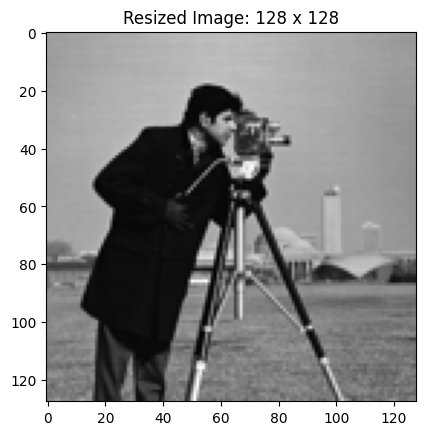

In [5]:
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image: 128 x 128')
plt.show()

Image Smoothening

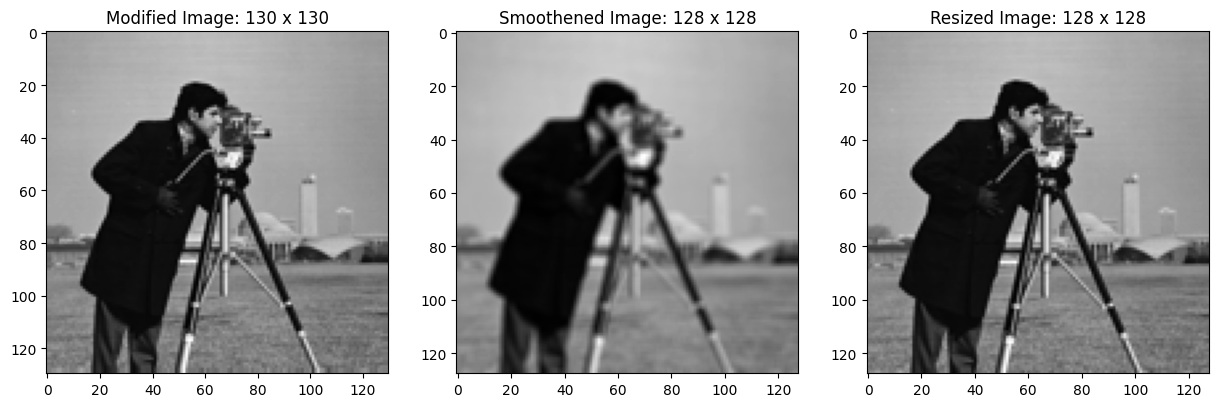

In [6]:
modified_img = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img[1:-1, 1:-1] = resized_img
modified_img[0, 1:-1] = resized_img[0,:]
modified_img[-1, 1:-1] = resized_img[-1,:]
modified_img[1:-1, 0] = resized_img[:,0]
modified_img[1:-1, -1] = resized_img[:,-1]
modified_img[0,0], modified_img[0,-1], modified_img[-1,-1], modified_img[-1,0] = resized_img[0,0], resized_img[0, -1], resized_img[-1,-1], resized_img[-1,0]

smoothened_img = np.zeros(shape = (128, 128))

for i in range(modified_img.shape[0]-2):
    for j in range(modified_img.shape[0]-2):
        smoothened_img[i,j] = int(sum(sum((1/9) * modified_img[i:i+3,j:j+3])))

fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img, cmap = 'gray')
ax[1].imshow(smoothened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Image: 130 x 130')
ax[1].set_title('Smoothened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

Image Sharpening

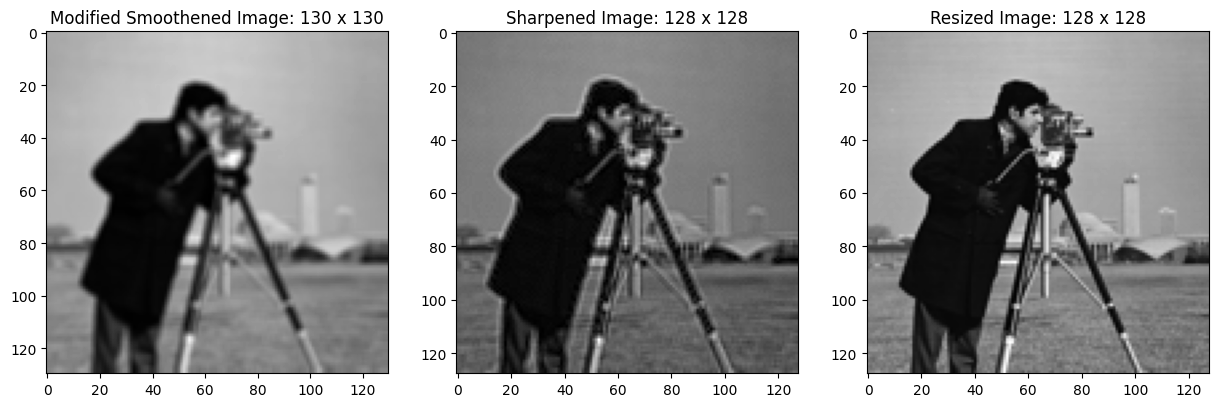

In [8]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (128, 128))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        if s >= 0:
            sharpened_img[i,j] = int(s)
        else:
            sharpened_img[i,j] = -int(s) # Dealing with Negative Values -> Taking absolute value


fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

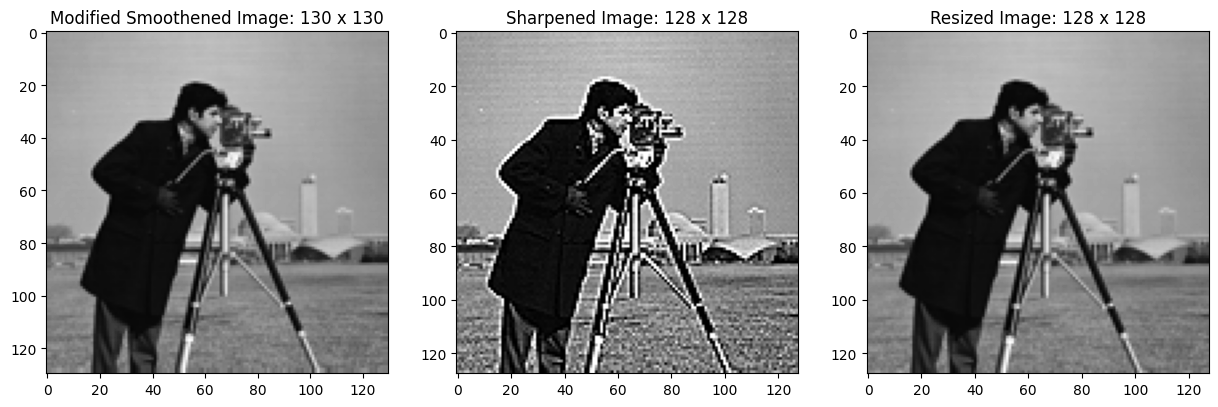

In [15]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = resized_img
modified_img1[0, 1:-1] = resized_img[0,:]
modified_img1[-1, 1:-1] = resized_img[-1,:]
modified_img1[1:-1, 0] = resized_img[:,0]
modified_img1[1:-1, -1] = resized_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = resized_img[0,0], resized_img[0, -1], resized_img[-1,-1], resized_img[-1,0]

sharpened_img = np.zeros(shape = (128, 128))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        if s >= 0 and s <=255:
            sharpened_img[i,j] = round(s, None)
        elif s > 255:
            sharpened_img[i,j] = 255
        else:
            sharpened_img[i,j] = 0 # Dealing with Negative Values -> Clamping at 0


fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

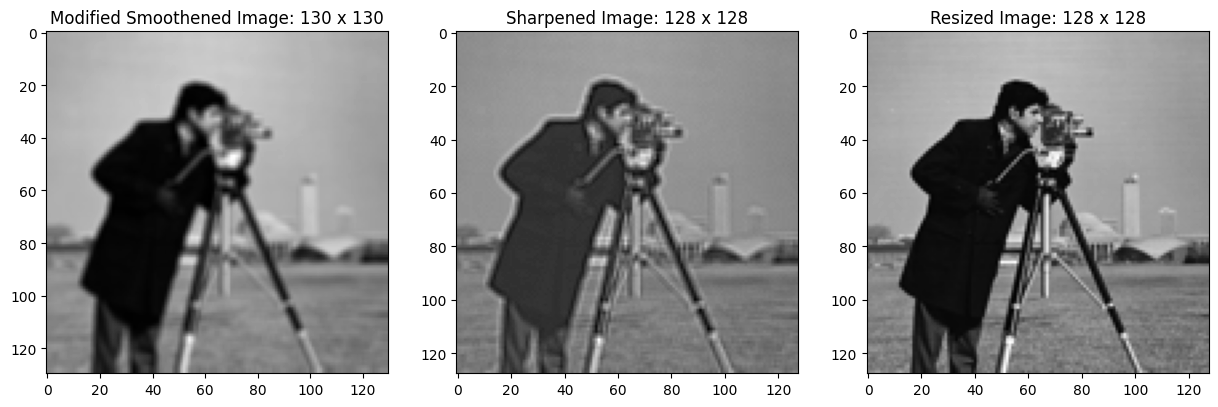

In [10]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (smoothened_img.shape[0]+2, smoothened_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (128, 128))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        sharpened_img[i,j] = round(s, None)


M, m = np.max(np.max(sharpened_img, axis = 1), axis = 0), np.min(np.min(sharpened_img, axis = 1), axis = 0)
# y = ax + b
a, b = (255)/(M-m), -(255*m)/(M-m)

for i in range(sharpened_img.shape[0]):
    for j in range(sharpened_img.shape[1]):
        sharpened_img[i,j] = round(sharpened_img[i,j]*a + b, None)

fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

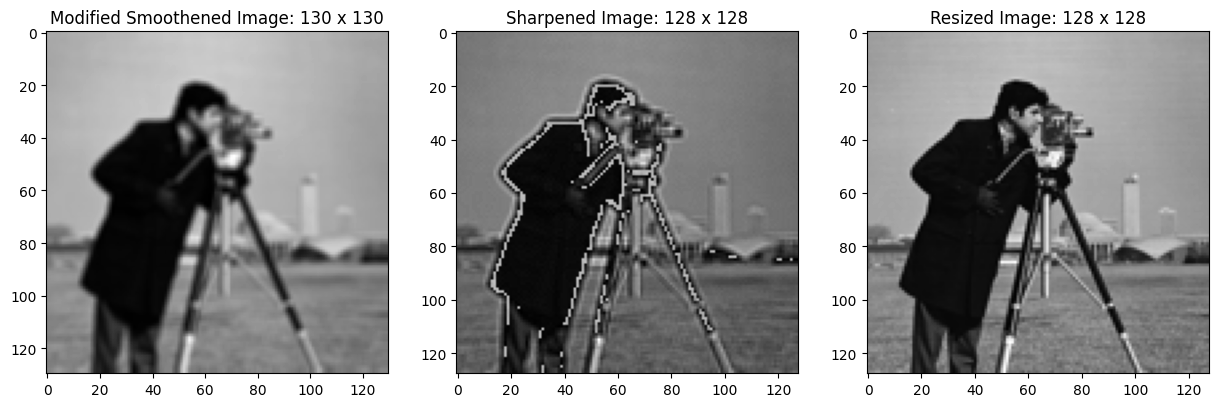

In [12]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (128, 128))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        s = sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))
        if s >= 0:
            sharpened_img[i,j] = int(s)
        else:
            sharpened_img[i,j] = 256 + int(s) # Dealing with Negative Values -> Adding 256 to output


fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

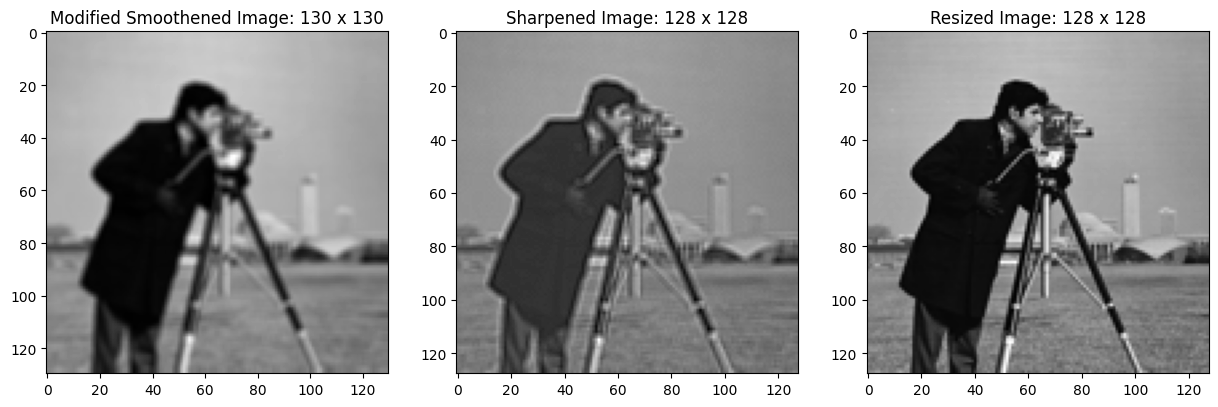

In [14]:
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

modified_img1 = np.zeros(shape = (resized_img.shape[0]+2, resized_img.shape[0]+2))
modified_img1[1:-1, 1:-1] = smoothened_img
modified_img1[0, 1:-1] = smoothened_img[0,:]
modified_img1[-1, 1:-1] = smoothened_img[-1,:]
modified_img1[1:-1, 0] = smoothened_img[:,0]
modified_img1[1:-1, -1] = smoothened_img[:,-1]
modified_img1[0,0], modified_img1[0,-1], modified_img1[-1,-1], modified_img1[-1,0] = smoothened_img[0,0], smoothened_img[0, -1], smoothened_img[-1,-1], smoothened_img[-1,0]

sharpened_img = np.zeros(shape = (128, 128))

for i in range(modified_img1.shape[0]-2):
    for j in range(modified_img1.shape[0]-2):
        sharpened_img[i,j] = int(sum(sum(laplacian_filter * modified_img1[i:i+3,j:j+3]))) # Doing nothing

fig, ax = plt.subplots(1,3, figsize = (15,8))
ax[0].imshow(modified_img1, cmap = 'gray')
ax[1].imshow(sharpened_img, cmap = 'gray')
ax[2].imshow(resized_img, cmap = 'gray')
ax[0].set_title('Modified Smoothened Image: 130 x 130')
ax[1].set_title('Sharpened Image: 128 x 128')
ax[2].set_title('Resized Image: 128 x 128')
plt.show()

Image Addition and Normalization

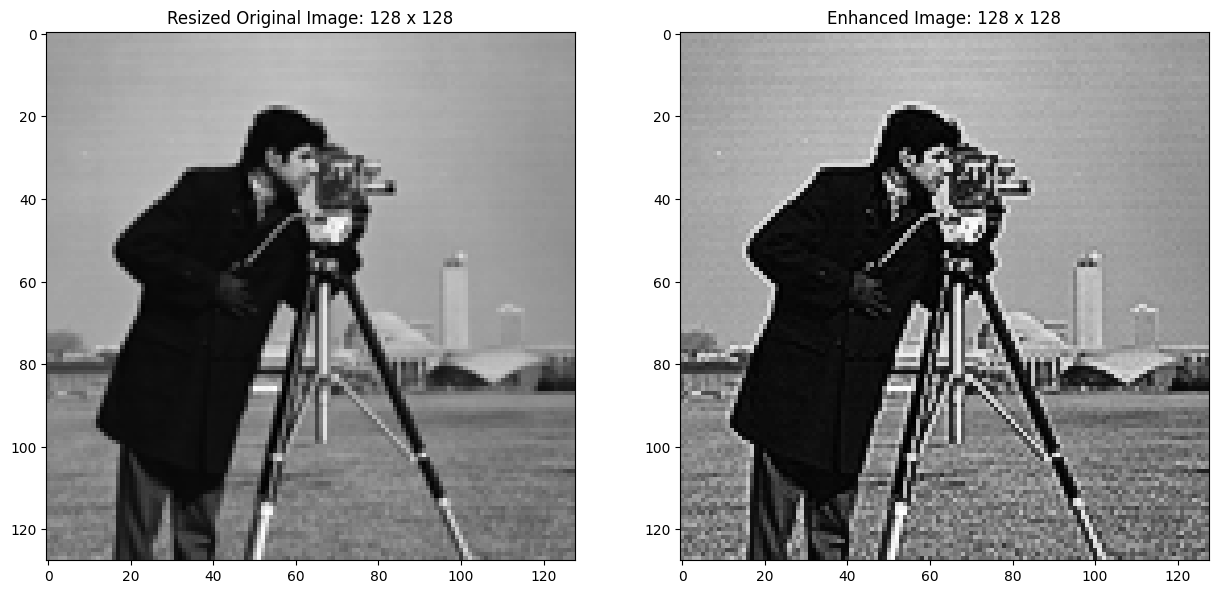

In [16]:
enhanced_img = (sharpened_img + resized_img)//2
fig, ax = plt.subplots(1,2, figsize = (15,8))
ax[0].imshow(resized_img, cmap = 'gray')
ax[1].imshow(enhanced_img, cmap = 'gray')
ax[1].set_title('Enhanced Image: 128 x 128')
ax[0].set_title('Resized Original Image: 128 x 128')
plt.show()

Test for FPGA Implementation

In [49]:
smoothened_img = np.zeros(shape = (126, 126))

for i in range(resized_img.shape[0]-2):
    for j in range(resized_img.shape[0]-2):
        smoothened_img[i,j] = np.sum((resized_img[i:i+3,j:j+3]))
infer = 680
print(bin(infer))
print(smoothened_img.reshape(-1,1)[infer])

0b1010101000
[1646.]
